<a href="https://colab.research.google.com/github/sarahasan17/Sentiment-Analysis-for-YouTube-Comments/blob/main/youtube_sentiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
!pip install youtube-comment-downloader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 4.0 MB/s eta 0:00:00


In [3]:
import pandas as pd
from youtube_comment_downloader import YoutubeCommentDownloader
import re
link = input("Youtube link: ")
saved = "data"

# Extract video ID from the YouTube link
video_id_match = re.search(r'v=([a-zA-Z0-9_-]+)', link)
if video_id_match:
    video_id = video_id_match.group(1)
else:
    print("Invalid YouTube link. Please provide a valid link.")
    exit()

# Initialize the YoutubeCommentDownloader object
youtube = YoutubeCommentDownloader()

# Fetch video comments by passing the video ID to get_comments()
response = youtube.get_comments(youtube_id=video_id)

all_data = []
for i, comment in enumerate(response):
    print(comment)
    all_data.append(comment)
    if i >= 100:  # It will print the structure of the first 100 comments
        break
df = pd.DataFrame(all_data)
df.to_csv(saved)

Youtube link: https://www.youtube.com/watch?v=bAyrObl7TYE&t=7s
{'cid': 'Ugx2X_CejOkWzj0Uokh4AaABAg', 'text': '🔥Professional Certificate Program in Data Engineering  - https://www.simplilearn.com/pgp-data-engineering-certification-training-course?utm_campaign=bAyrObl7TYE&utm_medium=Comments&utm_source=Youtube\n🔥IITK - Professional Certificate Course in Data Science (India Only) - https://www.simplilearn.com/iitk-professional-certificate-course-data-science?utm_campaign=bAyrObl7TYE&utm_medium=Comments&utm_source=Youtube\n🔥Caltech Post Graduate Program in Data Science  - https://www.simplilearn.com/post-graduate-program-data-science?utm_campaign=bAyrObl7TYE&utm_medium=Comments&utm_source=Youtube', 'time': '3 years ago (edited)', 'author': '@SimplilearnOfficial', 'channel': 'UCsvqVGtbbyHaMoevxPAq9Fg', 'votes': '33', 'replies': '', 'photo': 'https://yt3.ggpht.com/7q9t5rjeujEZYqY1xMLn0mvT4Zc6MaZBYgtseDL2_Zh42AOhMze8ep7BUKdR5FnxytMy3csj=s88-c-k-c0x00ffffff-no-rj', 'heart': True, 'reply': Fals

In [4]:
print(df)

                            cid  \
0    Ugx2X_CejOkWzj0Uokh4AaABAg   
1    UgytCpxgJTj3BeUiL8x4AaABAg   
2    UgzU2Tl6-lgvyEyeda54AaABAg   
3    UgwSkGWSt2UDIvkZfvt4AaABAg   
4    Ugz0W_FvJH42uAy6upB4AaABAg   
..                          ...   
96   Ugy3YidPrbdU_koov-R4AaABAg   
97   UgwidMYYiu4z0Lqt-ZR4AaABAg   
98   Ugz5np60lTHjUO7VRON4AaABAg   
99   UgwuUk__K4uQPSOdqhZ4AaABAg   
100  Ugwzje03jCpwbsVzt_F4AaABAg   

                                                  text                  time  \
0    🔥Professional Certificate Program in Data Engi...  3 years ago (edited)   
1    Nyc video I understand all the concepts in fir...            3 days ago   
2    Great information! Congrats on your educationa...           1 month ago   
3                                                    D          2 months ago   
4                                                    c          2 months ago   
..                                                 ...                   ...   
96            I lov

In [5]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os

# Import functions for data preprocessing & data preparation
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer, LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
import string
from string import punctuation
import nltk
import re

In [6]:
data = pd.read_csv(saved)
data.columns

Index(['Unnamed: 0', 'cid', 'text', 'time', 'author', 'channel', 'votes',
       'replies', 'photo', 'heart', 'reply', 'time_parsed'],
      dtype='object')

In [7]:
# Create a new DataFrame (data1) by dropping specified columns
columns_to_drop = ['Unnamed: 0', 'likes', 'time', 'user', 'userlink']
existing_columns = list(data.columns)
columns_to_drop = [col for col in columns_to_drop if col in existing_columns]  # Filter out non-existent columns

data1 = data.drop(columns=columns_to_drop, axis=1)

print(data1)

                            cid  \
0    Ugx2X_CejOkWzj0Uokh4AaABAg   
1    UgytCpxgJTj3BeUiL8x4AaABAg   
2    UgzU2Tl6-lgvyEyeda54AaABAg   
3    UgwSkGWSt2UDIvkZfvt4AaABAg   
4    Ugz0W_FvJH42uAy6upB4AaABAg   
..                          ...   
96   Ugy3YidPrbdU_koov-R4AaABAg   
97   UgwidMYYiu4z0Lqt-ZR4AaABAg   
98   Ugz5np60lTHjUO7VRON4AaABAg   
99   UgwuUk__K4uQPSOdqhZ4AaABAg   
100  Ugwzje03jCpwbsVzt_F4AaABAg   

                                                  text                author  \
0    🔥Professional Certificate Program in Data Engi...  @SimplilearnOfficial   
1    Nyc video I understand all the concepts in fir...           @ItzzCharan   
2    Great information! Congrats on your educationa...    @KeepUpEducational   
3                                                    D     @omkarnavpute7033   
4                                                    c           @EswarN-f7e   
..                                                 ...                   ...   
96            I lov

In [8]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [9]:
data1["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data1["text"]]
data1["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data1["text"]]
data1["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data1["text"]]
data1['Compound'] = [sentiments.polarity_scores(i)["compound"] for i in data1["text"]]
score = data1["Compound"].values
sentiment = []
for i in score:
    if i >= 0.05 :
        sentiment.append('Positive')
    elif i <= -0.05 :
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
data1["Sentiment"] = sentiment
data1.head()

,cid,text,author,channel,votes,replies,photo,heart,reply,time_parsed,Positive,Negative,Neutral,Compound,Sentiment
0,Ugx2X_CejOkWzj0Uokh4AaABAg,🔥Professional Certificate Program in Data Engi...,@SimplilearnOfficial,UCsvqVGtbbyHaMoevxPAq9Fg,33,NaN,https://yt3.ggpht.com/7q9t5rjeujEZYqY1xMLn0mvT...,True,False,1.633457e+09,0.000,0.0,1.000,0.0000,Neutral
1,UgytCpxgJTj3BeUiL8x4AaABAg,Nyc video I understand all the concepts in fir...,@ItzzCharan,UC5BcfD1HQjCZO-rd0xyLudQ,0,1.0,https://yt3.ggpht.com/6fu_PDBy4fTsfXl8n7Cx47vO...,False,False,1.727892e+09,0.000,0.0,1.000,0.0000,Neutral
2,UgzU2Tl6-lgvyEyeda54AaABAg,Great information! Congrats on your educationa...,@KeepUpEducational,UCGq13uWA4Mmm4-Wt899O53Q,0,NaN,https://yt3.ggpht.com/cVY9m9nkfl-phhmYCMr-lYx7...,False,False,1.725559e+09,0.618,0.0,0.382,0.8436,Positive
3,UgwSkGWSt2UDIvkZfvt4AaABAg,D,@omkarnavpute7033,UCGC5AZ6cRVDFIAvxlgk6tNw,0,NaN,https://yt3.ggpht.com/ytc/AIdro_n61v7Lcb70yOcw...,False,False,1.722881e+09,0.000,0.0,0.000,0.0000,Neutral
4,Ugz0W_FvJH42uAy6upB4AaABAg,c,@EswarN-f7e,UCnD-Eq_bbpY8eYWtfeRG2SA,0,NaN,https://yt3.ggpht.com/ytc/AIdro_mlEnA_CYn0rV_-...,False,False,1.722881e+09,0.000,0.0,0.000,0.0000,Neutral


In [10]:
data2=data1.drop(['Positive','Negative','Neutral','Compound'],axis=1)
data2.head()

,cid,text,author,channel,votes,replies,photo,heart,reply,time_parsed,Sentiment
0,Ugx2X_CejOkWzj0Uokh4AaABAg,🔥Professional Certificate Program in Data Engi...,@SimplilearnOfficial,UCsvqVGtbbyHaMoevxPAq9Fg,33,NaN,https://yt3.ggpht.com/7q9t5rjeujEZYqY1xMLn0mvT...,True,False,1.633457e+09,Neutral
1,UgytCpxgJTj3BeUiL8x4AaABAg,Nyc video I understand all the concepts in fir...,@ItzzCharan,UC5BcfD1HQjCZO-rd0xyLudQ,0,1.0,https://yt3.ggpht.com/6fu_PDBy4fTsfXl8n7Cx47vO...,False,False,1.727892e+09,Neutral
2,UgzU2Tl6-lgvyEyeda54AaABAg,Great information! Congrats on your educationa...,@KeepUpEducational,UCGq13uWA4Mmm4-Wt899O53Q,0,NaN,https://yt3.ggpht.com/cVY9m9nkfl-phhmYCMr-lYx7...,False,False,1.725559e+09,Positive
3,UgwSkGWSt2UDIvkZfvt4AaABAg,D,@omkarnavpute7033,UCGC5AZ6cRVDFIAvxlgk6tNw,0,NaN,https://yt3.ggpht.com/ytc/AIdro_n61v7Lcb70yOcw...,False,False,1.722881e+09,Neutral
4,Ugz0W_FvJH42uAy6upB4AaABAg,c,@EswarN-f7e,UCnD-Eq_bbpY8eYWtfeRG2SA,0,NaN,https://yt3.ggpht.com/ytc/AIdro_mlEnA_CYn0rV_-...,False,False,1.722881e+09,Neutral


In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
stop_words = stopwords.words('english')
#The Porter stemming algorithm is used for reducing words to their root or base form by removing suffixes.
porter_stemmer = PorterStemmer()
#The Lancaster stemming algorithm is another method for reducing words to their base form, potentially producing more aggressive stemming compared to the Porter stemmer.
lancaster_stemmer = LancasterStemmer()
#The Snowball stemmer is an improvement over the original Porter stemmer, providing more accurate stemming.
snowball_stemer = SnowballStemmer(language="english")
#Lemmatization involves reducing words to their base or root form (lemma) based on their meaning. WordNet is a lexical database that the lemmatizer uses to determine the base form of a word.
lzr = WordNetLemmatizer()


In [13]:
def text_processing(text):
    text = text.lower()
    text = re.sub(r'\n',' ', text)
    text = re.sub('[%s]' % re.escape(punctuation), "", text)
    text = re.sub("^a-zA-Z0-9$,.", "", text)
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    text = re.sub(r'\W', ' ', text)
    text = ' '.join([word for word in word_tokenize(text) if word not in stop_words])

    # stemming using porter stemmer from nltk package - msh a7sn 7aga - momken: lancaster, snowball
    # text=' '.join([porter_stemmer.stem(word) for word in word_tokenize(text)])
    # text=' '.join([lancaster_stemmer.stem(word) for word in word_tokenize(text)])
    # text=' '.join([snowball_stemer.stem(word) for word in word_tokenize(text)])

    # lemmatizer using WordNetLemmatizer from nltk package
    text=' '.join([lzr.lemmatize(word) for word in word_tokenize(text)])

    return text


In [14]:
import nltk
#'Punkt' is a pre-trained unsupervised machine learning model for tokenization, which is the process of breaking down a text into individual words or tokens.
nltk.download('punkt')
#WordNet is a lexical database of the English language that includes information about words, their meanings, and relationships.
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [15]:
data_copy = data2.copy()
data_copy.text = data_copy.text.apply(lambda text: text_processing(text))

In [16]:
le = LabelEncoder()
data_copy['Sentiment'] = le.fit_transform(data_copy['Sentiment'])

In [17]:
processed_data = {
    'Sentence':data_copy.text,
    'Sentiment':data_copy['Sentiment']
}

processed_data = pd.DataFrame(processed_data)
processed_data.head()

,Sentence,Sentiment
0,professional certificate program data engineer...,1
1,nyc video understand concept first term,1
2,great information congrats educational initiative,2
3,,1
4,c,1


In [18]:
processed_data['Sentiment'].value_counts()

,count
Sentiment,
1,71
2,26
0,4


In [19]:
df_neutral = processed_data[(processed_data['Sentiment']==1)]
df_negative = processed_data[(processed_data['Sentiment']==0)]
df_positive = processed_data[(processed_data['Sentiment']==2)]

df_negative_upsampled = resample(df_negative,
                                 replace=True,
                                 n_samples= 205,
                                 random_state=42)

df_neutral_upsampled = resample(df_neutral,
                                replace=True,
                                n_samples= 205,
                                random_state=42)



# Concatenate the upsampled dataframes with the neutral dataframe
final_data = pd.concat([df_negative_upsampled,df_neutral_upsampled,df_positive])
final_data2 = pd.concat([df_negative,df_neutral,df_positive])

In [20]:
final_data['Sentiment'].value_counts()

,count
Sentiment,
0,205
1,205
2,26


In [21]:
final_data2['Sentiment'].value_counts()

,count
Sentiment,
1,71
2,26
0,4


In [22]:
corpus = []
for sentence in final_data['Sentence']:
    corpus.append(sentence)
corpus


['option wrong',
 'big data form journalism scientifically say yes chatgpt',
 'hi found correct answer option c wrong statement hdfs perform parallel processing work mapreduce hdfs storage layer hadoop store smaller chunk data multiple data node distributed manner asked incorrect statement answer option c',
 'option wrong',
 'option wrong',
 'big data form journalism scientifically say yes chatgpt',
 'hi found correct answer option c wrong statement hdfs perform parallel processing work mapreduce hdfs storage layer hadoop store smaller chunk data multiple data node distributed manner asked incorrect statement answer option c',
 'hi found correct answer option c wrong statement hdfs perform parallel processing work mapreduce hdfs storage layer hadoop store smaller chunk data multiple data node distributed manner asked incorrect statement answer option c',
 'option wrong',
 'option c wrong hdfs',
 'option wrong',
 'option wrong',
 'option wrong',
 'option wrong',
 'big data form journali

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = final_data.iloc[:, -1].values

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[66,  0,  0],
       [39, 20,  0],
       [ 1,  0,  5]])

In [26]:
#To measure the accuracy of the sentiments
nb_score = accuracy_score(y_test, y_pred)
print('accuracy',nb_score)


accuracy 0.6946564885496184


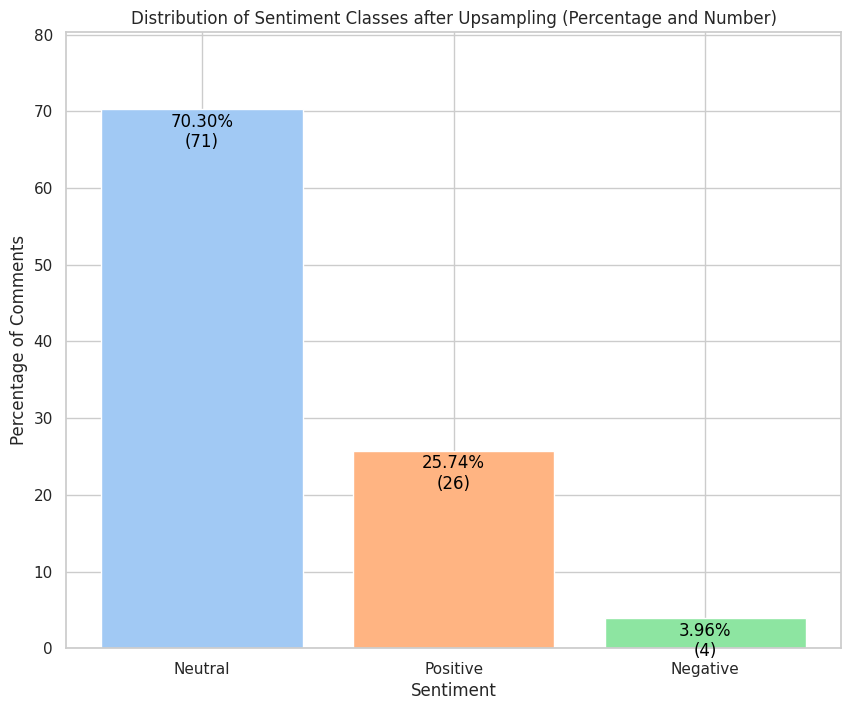

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'final_data2' is the balanced dataset after upsampling
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))

# Calculate the percentage of each sentiment class
total_comments = len(final_data2)
sentiment_counts = final_data2['Sentiment'].value_counts()
sentiment_percentages = (sentiment_counts / total_comments) * 100

# Define the colors for the bar plot
colors = sns.color_palette("pastel", len(sentiment_counts))

# Map the sentiment labels
sentiment_labels = sentiment_counts.index.map({0: 'Negative', 1: 'Neutral', 2: 'Positive'})

# Plot a bar graph with custom colors
bars = plt.bar(sentiment_labels, sentiment_percentages.values, color=colors)

# Add text annotations to display the percentage and the number of comments
for bar, count, percentage in zip(bars, sentiment_counts.values, sentiment_percentages.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 3,
             f'{percentage:.2f}%\n({count})',
             ha='center', va='center', color='black', fontsize=12)

plt.xlabel('Sentiment')
plt.ylabel('Percentage of Comments')
plt.title('Distribution of Sentiment Classes after Upsampling (Percentage and Number)')
plt.ylim(0, max(sentiment_percentages.values) + 10)  # Adjust ylim for better visibility
plt.show()
